<a href="https://colab.research.google.com/github/AldiMusneldi/Testing/blob/main/Motion%20Guide/TrainAndBuildModelPotatoDisesase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))


GPU Available:  []


In [ ]:
!ls -lh PlantVillage.zip

-rw-r--r-- 1 root root 38M Nov  9 06:47 PlantVillage.zip


In [ ]:
import zipfile
import os

# Masukan nama file zip yang akan digunakan
path_zip = "PlantVillage.zip"

# Buat folder untuk menyimpan hasil extract file zip
path_extract = "PlantVillage"

# Mengekstrak file zip
with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_extract)

# Menampilkan daftar file yang telah diekstrak
extracted_files = os.listdir(path_extract)
print("File yang telah diekstrak:", extracted_files)


File yang telah diekstrak: ['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']


#Data Exploration

Class: Potato___healthy - Jumlah Sampel: 152
-----------------------------------------------------


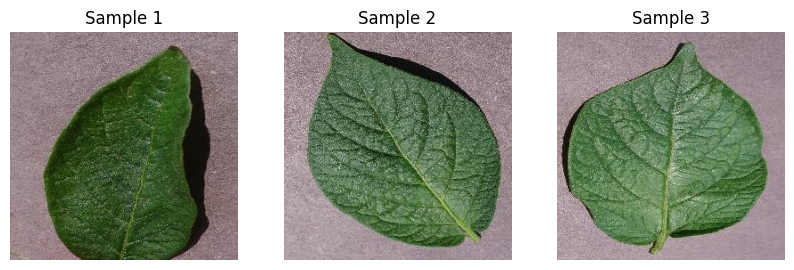

Class: Potato___Late_blight - Jumlah Sampel: 1000
-----------------------------------------------------


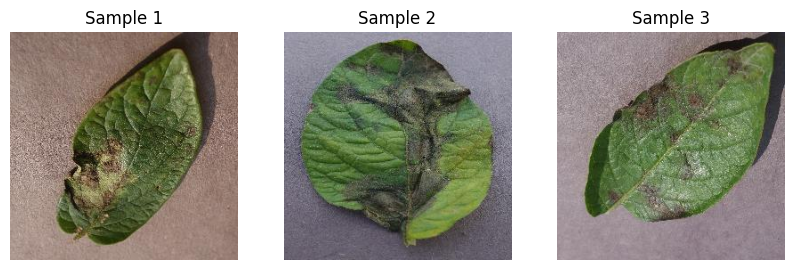

Class: Potato___Early_blight - Jumlah Sampel: 1000
-----------------------------------------------------


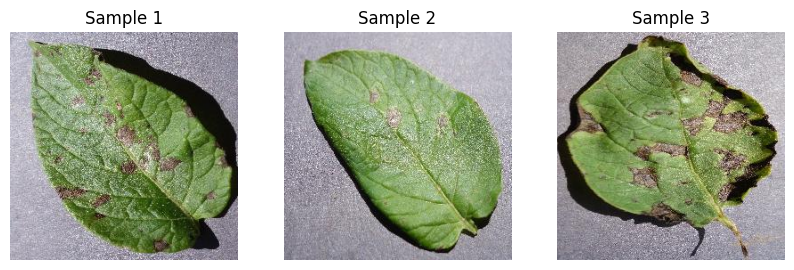

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_dataset = "PlantVillage"

class_counts = {}

# Loop melalui setiap kelas
for class_name in os.listdir(path_dataset):
    class_folder = os.path.join(path_dataset, class_name)

    # Pastikan yang di-loop adalah folder, bukan file
    if os.path.isdir(class_folder):
        # Hitung jumlah gambar dalam setiap kelas
        num_images = len(os.listdir(class_folder))
        class_counts[class_name] = num_images

        # Tampilkan beberapa contoh gambar dari setiap kelas
        print(f"Class: {class_name} - Jumlah Sampel: {num_images}")
        print("-----------------------------------------------------")
        plt.figure(figsize=(10, 5))
        for i, image_file in enumerate(os.listdir(class_folder)[:3]):
            # Path lengkap menuju gambar
            image_path = os.path.join(class_folder, image_file)
            # Membaca dan menampilkan gambar menggunakan Matplotlib
            plt.subplot(1, 3, i + 1)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(f"Sample {i + 1}")
            plt.axis('off')  # Menghilangkan sumbu
        plt.show()

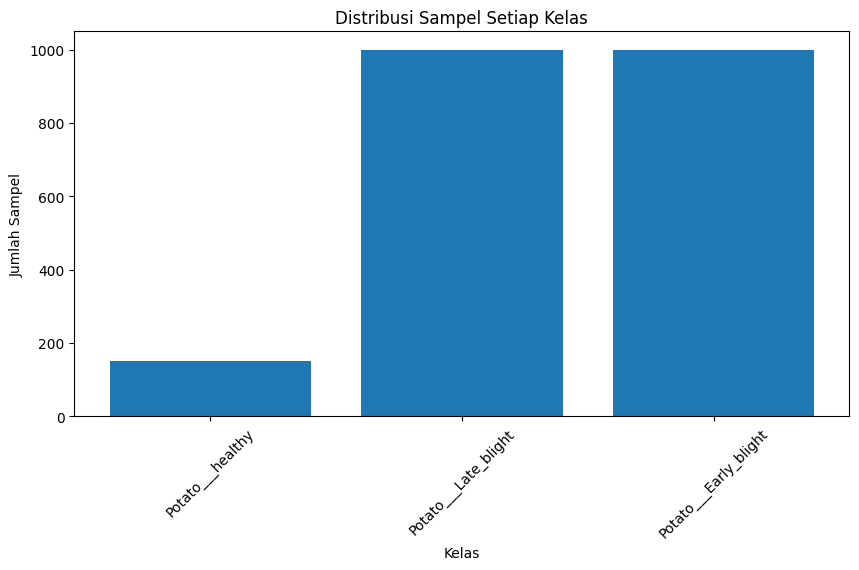

In [ ]:
# Tampilkan distribusi sampel setiap kelas
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Distribusi Sampel Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.show()

#Data Split

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS= 50

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
len(dataset)

68

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#Data Augmentation

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

IMAGE_SIZE = 256  # Set your desired image size here

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])
